In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
df_train = pd.read_csv("train.csv") 
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
dix = pd.DatetimeIndex(df_train.datetime)
df_train['hour']=dix.hour
df_train['day']=dix.dayofweek
df_train['month']=dix.month
del df_train['datetime']
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1


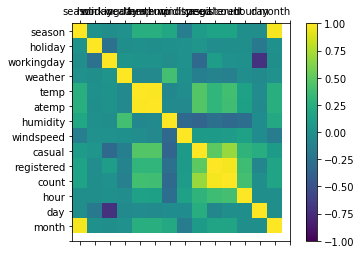

In [3]:
names = list(df_train.columns)
correlations = df_train.corr()  #计算变量之间的相关系数矩阵
# plot correlation matrix
fig = plt.figure() #调用figure创建一个绘图对象  50,30),dpi=50
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)  #绘制热力图，从-1到1
fig.colorbar(cax)  #将matshow生成热力图设置为颜色渐变条
ticks = np.arange(0,15,1) #生成0-12，步长为1
ax.set_xticks(ticks)  #生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names) #生成x轴标签
ax.set_yticklabels(names)
plt.show()

In [4]:
df_train.corr()[10:11]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.0,0.400601,-0.002283,0.166862


### 发现 count 与 temp(atemp)、humidity、hour 关联度较大
### 但将这些关联度大的作为特征值时，最后得到的评分最多大约为 0.6左右

In [5]:
df_train_target = df_train['count']
df_train_target[:6]

0    16
1    40
2    32
3    13
4     1
5     1
Name: count, dtype: int64

In [6]:
col = ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','day','month']

In [7]:
len(col)

11

In [8]:
from itertools import combinations
def combine(col, n):
    # 所有n个元素的组合
    temp = []
    for i in combinations(col, n):
        temp.append(i)
    return temp

In [9]:
col2 = combine(col, 2)
col2[:6]

[('season', 'holiday'),
 ('season', 'workingday'),
 ('season', 'weather'),
 ('season', 'temp'),
 ('season', 'atemp'),
 ('season', 'humidity')]

In [10]:
#for i in col2:
#    print(list(i))

In [12]:
??cross_val_score

### 全组合暴力求最优的特征

In [16]:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
cnt = 0
pre_score = 0
print("随机森林回归/Random Forest(n_estimators = 50)") 
for i in range(len(col)):
    fea = combine(col, i+1)
    for j in fea:
        cnt += 1
        df_train_data = df_train[list(j)].values
        # 标准化数据
        df_train_data = preprocessing.scale(df_train_data)
        
        print(cnt)
        kf = KFold(n_splits=5,shuffle=True)
        score = 0
        for train, test in kf.split(df_train_data):    
            rfrModel = RandomForestRegressor(n_estimators = 50).fit(df_train_data[train], df_train_target[train])
            #print("train score: {0:.3f}, test score: {1:.3f}\n".format(
            #    rfrModel.score(df_train_data[train], df_train_target[train]), 
            #    rfrModel.score(df_train_data[test], df_train_target[test])))
            score += rfrModel.score(df_train_data[test], df_train_target[test])
        score /= 5
        if score > pre_score:
            pre_score = score
            print(list(j))
            print(score)

随机森林回归/Random Forest(n_estimators = 50)
1
['season']
0.06021654732490844
2
3
4
5
['temp']
0.16267300923435746
6
['atemp']
0.17269965336020474
7
8
9
['hour']
0.5117439549109306
10
11
12
13
14
15
16
17
18
19
['season', 'hour']
0.6004300781321097
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
['workingday', 'hour']
0.6512273890794158
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
['season', 'workingday', 'hour']
0.7444315256166074
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
['workingday', 'temp', 'hour']
0.7449346793612233
159
160
161
162
163
['workingday', 'atemp', 'hour']
0.7474774410435165
164
165
166
167
168
169
170
171
172
173
174
['workingday', 'hour'

KeyboardInterrupt: 

### 运行 500 组解后发现特征值为 ['month','hour','humidity','workingday'] 时评分较高

In [17]:
df_train_data = df_train[['month','hour','humidity','workingday']].values
#df_train_data = df_train.drop(['count','datetime','casual','registered','windspeed'],axis = 1).values
df_train_data

array([[ 1,  0, 81,  0],
       [ 1,  1, 80,  0],
       [ 1,  2, 80,  0],
       ...,
       [12, 21, 61,  1],
       [12, 22, 61,  1],
       [12, 23, 66,  1]], dtype=int64)

In [18]:
# 标准化数据
from sklearn import preprocessing
df_train_data = preprocessing.scale(df_train_data)
# df_train_data

In [23]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
kf = KFold(n_splits=5,shuffle=True)
print("随机森林回归/Random Forest(n_estimators = 50)")    
for train, test in kf.split(df_train_data):    
    rfrModel = RandomForestRegressor(n_estimators = 50).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        rfrModel.score(df_train_data[train], df_train_target[train]), 
        rfrModel.score(df_train_data[test], df_train_target[test])))

随机森林回归/Random Forest(n_estimators = 50)
train score: 0.947, test score: 0.794

train score: 0.947, test score: 0.793

train score: 0.948, test score: 0.796

train score: 0.950, test score: 0.772

train score: 0.948, test score: 0.802



In [24]:
for train, test in kf.split(df_train_data): 
    print(train)
    print (test)
    print()
print(train.shape)
print(test.shape)

[    2     3     4 ... 10882 10883 10884]
[    0     1    13 ... 10872 10881 10885]

[    0     1     2 ... 10883 10884 10885]
[    6     8    11 ... 10873 10874 10878]

[    0     1     2 ... 10883 10884 10885]
[    7    10    16 ... 10868 10877 10879]

[    0     1     2 ... 10883 10884 10885]
[    4    19    22 ... 10862 10864 10875]

[    0     1     4 ... 10879 10881 10885]
[    2     3     5 ... 10882 10883 10884]

(8709,)
(2177,)


In [25]:
# 交叉验证计算评分
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(), df_train_data, df_train_target, cv=5).mean()

0.18533946845313087

In [26]:
from sklearn.model_selection import train_test_split
# 将数据分割为训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(df_train_data, df_train_target, test_size=0.3, random_state=3)

### n_estimators 的学习曲线，确定大致范围，间隔是10

0.20512092367512214


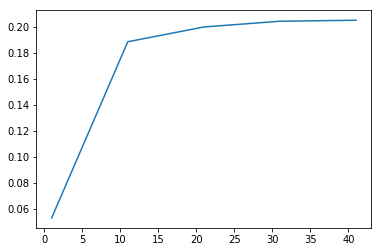

In [27]:
scores = []
for i in range(0,50,10):
    rf = RandomForestRegressor(n_estimators=i+1, random_state=10)
    score = cross_val_score(rf, df_train_data, df_train_target, cv=5).mean()
    scores.append(score)
print(max(scores))
plt.plot(range(1,51,10),scores)
plt.show()

### 发现 n_estimators 似乎越大越好，但 n_estimators 越大，时间耗费越多

In [28]:
from sklearn.model_selection import GridSearchCV
# 用GridSearchCV寻找最优参数（字典）
param = {'criterion':['mse'], 'n_estimators':[10, 30, 50]}
grid = GridSearchCV(RandomForestRegressor(), param_grid=param, cv=6)
grid.fit(X_train, y_train)
print('最佳度量值:',grid.best_score_)  # 获取最佳度量值
print('最佳参数：',grid.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('最佳模型：',grid.best_estimator_)  # 获取最佳度量时的分类器模型

最佳度量值: 0.7794696607097061
最佳参数： {'criterion': 'mse', 'n_estimators': 50}
最佳模型： RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


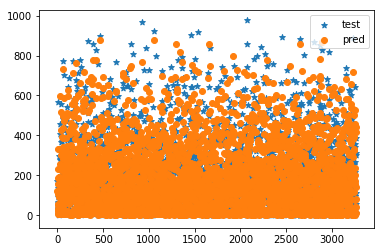

In [29]:
# 画图展示训练结果,分别为测试值和预测值
y_pred = grid.predict(X_test)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list(range(len(X_test))),y_test,marker='*')
ax.scatter(list(range(len(X_test))),y_pred,marker='o')  # 不管是画散点图还是折现图，都会被挡住
plt.legend(labels=['test', 'pred'])
plt.show()

In [30]:
# ??RandomForestRegressor

In [31]:
# ??GridSearchCV

Automatically created module for IPython interactive environment


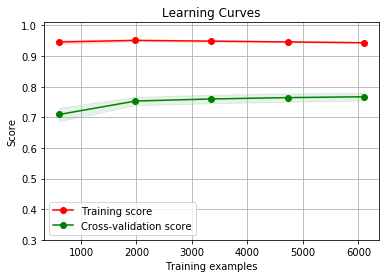

In [32]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.3, 1.01), cv=cv, n_jobs=4)

plt.show()

In [63]:
from sklearn import ensemble
# 拟合回归模型
params = {'n_estimators': 500,
          'max_depth': 4, 
          'min_samples_split': 2, 
          'learning_rate': 0.01, 
          'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [64]:
clf.score(X_test, y_test)  # 准确率

0.0776450463422409

Text(0.5,1,'Variable Importance')

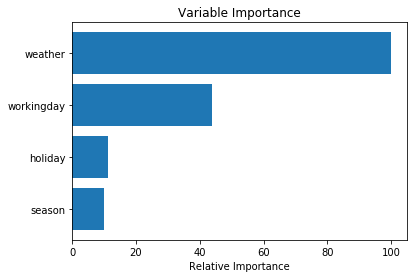

In [65]:
# 重要特征
feature_importance = clf.feature_importances_
feature_importance = 100.0*(feature_importance/feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])+0.5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, names)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')